In [2]:
import xarray
import matplotlib.pyplot as plt 
import matplotlib
import matplotlib.dates as mdates 
from netCDF4 import Dataset
import netCDF4 
import datetime
import numpy as np
import netCDF4 as netcdf
import pandas as pd
import octant.roms as roms
import matplotlib.colors as colors
import octant.roms
from scipy.signal import savgol_filter

ModuleNotFoundError: No module named 'octant'

Import Model Output Files

In [ ]:
ncfiles_all = ['/d2/copano_bay/2010_n/jan_2010/output_jan_2010.nc',
       '/d2/copano_bay/2010_n/feb_2010/output_feb_2010.nc',
       '/d2/copano_bay/2010_n/march_2010/output_march_2010.nc',
       '/d2/copano_bay/2010_n/april_2010/output_april_2010.nc',
       '/d2/copano_bay/2010_n/may_2010/output_may_2010.nc',
       '/d2/copano_bay/2010_n/june_2010/output_june_2010.nc',
       '/d2/copano_bay/2010_n/july_2010/output_july_2010.nc',
       '/d2/copano_bay/2010_n/aug_2010/output_aug_2010.nc',
       '/d2/copano_bay/2010_n/sep_2010/output_sep_2010.nc',
       '/d2/copano_bay/2010_n/oct_2010/output_oct_2010.nc',
       '/d2/copano_bay/2010_n/nov_2010/output_nov_2010.nc',
       '/d2/copano_bay/2010_n/dec_2010/output_dec_2010.nc',
       '/d2/copano_bay/2011_n/jan_2011/output_jan_2011.nc',
       '/d2/copano_bay/2011_n/feb_2011/output_feb_2011.nc',
       '/d2/copano_bay/2011_n/march_2011/output_march_2011.nc',
       '/d2/copano_bay/2011_n/april_2011/output_april_2011.nc',
       '/d2/copano_bay/2011_n/may_2011/output_may_2011.nc',
       '/d2/copano_bay/2011_n/june_2011/output_june_2011.nc',
       '/d2/copano_bay/2011_n/july_2011/output_july_2011.nc',
       '/d2/copano_bay/2011_n/aug_2011/output_aug_2011.nc',
       '/d2/copano_bay/2011_n/sep_2011/output_sep_2011.nc',
       '/d2/copano_bay/2011_n/oct_2011/output_oct_2011.nc',
       '/d2/copano_bay/2011_n/nov_2011/output_nov_2011.nc',
       '/d2/copano_bay/2011_n/dec_2011/output_dec_2011.nc',
       '/d2/copano_bay/2012_n/jan_2012/output_jan_2012.nc',
       '/d2/copano_bay/2012_n/feb_2012/output_feb_2012.nc',
       '/d2/copano_bay/2012_n/march_2012/output_march_2012.nc',
       '/d2/copano_bay/2012_n/april_2012/output_april_2012.nc',
       '/d2/copano_bay/2012_n/may_2012/output_may_2012.nc',
       '/d2/copano_bay/2012_n/june_2012/output_june_2012.nc',
       '/d2/copano_bay/2012_n/july_2012/output_july_2012.nc',
       '/d2/copano_bay/2012_n/aug_2012/output_aug_2012.nc',
       '/d2/copano_bay/2012_n/sep_2012/output_sep_2012.nc',
       '/d2/copano_bay/2012_n/oct_2012/output_oct_2012.nc',
       '/d2/copano_bay/2012_n/nov_2012/output_nov_2012.nc',
       '/d2/copano_bay/2012_n/dec_2012/output_dec_2012.nc',
       '/d2/copano_bay/2013_n/jan_2013/output_jan_2013.nc',
       '/d2/copano_bay/2013_n/feb_2013/output_feb_2013.nc',
       '/d2/copano_bay/2013_n/march_2013/output_march_2013.nc',
       '/d2/copano_bay/2013_n/april_2013/output_april_2013.nc',
       '/d2/copano_bay/2013_n/may_2013/output_may_2013.nc',
       '/d2/copano_bay/2013_n/june_2013/output_june_2013.nc',
       '/d2/copano_bay/2013_n/july_2013/output_july_2013.nc',
       '/d2/copano_bay/2013_n/aug_2013/output_aug_2013.nc',
       '/d2/copano_bay/2013_n/sep_2013/output_sep_2013.nc',
       '/d2/copano_bay/2013_n/oct_2013/output_oct_2013.nc',
       '/d2/copano_bay/2013_n/nov_2013/output_nov_2013.nc',
       '/d2/copano_bay/2013_n/dec_2013/output_dec_2013.nc',
       '/d2/copano_bay/2014_n/jan_2014/output_jan_2014.nc',
       '/d2/copano_bay/2014_n/feb_2014/output_feb_2014.nc',
       '/d2/copano_bay/2014_n/march_2014/output_march_2014.nc',
       '/d2/copano_bay/2014_n/april_2014/output_april_2014.nc',
       '/d2/copano_bay/2014_n/may_2014/output_may_2014.nc',
       '/d2/copano_bay/2014_n/june_2014/output_june_2014.nc',
       '/d2/copano_bay/2014_n/july_2014/output_july_2014.nc',
       '/d2/copano_bay/2014_n/aug_2014/output_aug_2014.nc',
       '/d2/copano_bay/2014_n/sep_2014/output_sep_2014.nc',
       '/d2/copano_bay/2014_n/oct_2014/output_oct_2014.nc',
       '/d2/copano_bay/2014_n/nov_2014/output_nov_2014.nc',
       '/d2/copano_bay/2014_n/dec_2014/output_dec_2014.nc',
       '/d2/copano_bay/2015_n/jan_2015/output_jan_2015.nc',
       '/d2/copano_bay/2015_n/feb_2015/output_feb_2015.nc',
       '/d2/copano_bay/2015_n/march_2015/output_march_2015.nc',
       '/d2/copano_bay/2015_n/april_2015/output_april_2015.nc',
       '/d2/copano_bay/2015_n/may_2015/output_may_2015.nc',
       '/d2/copano_bay/2015_n/june_2015/output_june_2015.nc',
       '/d2/copano_bay/2015_n/july_2015/output_july_2015.nc',
       '/d2/copano_bay/2015_n/aug_2015/output_aug_2015.nc',
       '/d2/copano_bay/2015_n/sep_2015/output_sep_2015.nc',
       '/d2/copano_bay/2015_n/oct_2015/output_oct_2015.nc',
       '/d2/copano_bay/2015_n/nov_2015/output_nov_2015.nc',
       '/d2/copano_bay/2015_n/dec_2015/output_dec_2015.nc',]

ds = xarray.open_mfdataset(ncfiles_all)
nc = netCDF4.MFDataset(['/d2/copano_bay/2010_n/jan_2010/output_jan_2010.nc',
       '/d2/copano_bay/2010_n/feb_2010/output_feb_2010.nc',
       '/d2/copano_bay/2010_n/march_2010/output_march_2010.nc',
       '/d2/copano_bay/2010_n/april_2010/output_april_2010.nc',
       '/d2/copano_bay/2010_n/may_2010/output_may_2010.nc',
       '/d2/copano_bay/2010_n/june_2010/output_june_2010.nc',
       '/d2/copano_bay/2010_n/july_2010/output_july_2010.nc',
       '/d2/copano_bay/2010_n/aug_2010/output_aug_2010.nc',
       '/d2/copano_bay/2010_n/sep_2010/output_sep_2010.nc',
       '/d2/copano_bay/2010_n/oct_2010/output_oct_2010.nc',
       '/d2/copano_bay/2010_n/nov_2010/output_nov_2010.nc',
       '/d2/copano_bay/2010_n/dec_2010/output_dec_2010.nc',
       '/d2/copano_bay/2011_n/jan_2011/output_jan_2011.nc',
       '/d2/copano_bay/2011_n/feb_2011/output_feb_2011.nc',
       '/d2/copano_bay/2011_n/march_2011/output_march_2011.nc',
       '/d2/copano_bay/2011_n/april_2011/output_april_2011.nc',
       '/d2/copano_bay/2011_n/may_2011/output_may_2011.nc',
       '/d2/copano_bay/2011_n/june_2011/output_june_2011.nc',
       '/d2/copano_bay/2011_n/july_2011/output_july_2011.nc',
       '/d2/copano_bay/2011_n/aug_2011/output_aug_2011.nc',
       '/d2/copano_bay/2011_n/sep_2011/output_sep_2011.nc',
       '/d2/copano_bay/2011_n/oct_2011/output_oct_2011.nc',
       '/d2/copano_bay/2011_n/nov_2011/output_nov_2011.nc',
       '/d2/copano_bay/2011_n/dec_2011/output_dec_2011.nc',
       '/d2/copano_bay/2012_n/jan_2012/output_jan_2012.nc',
       '/d2/copano_bay/2012_n/feb_2012/output_feb_2012.nc',
       '/d2/copano_bay/2012_n/march_2012/output_march_2012.nc',
       '/d2/copano_bay/2012_n/april_2012/output_april_2012.nc',
       '/d2/copano_bay/2012_n/may_2012/output_may_2012.nc',
       '/d2/copano_bay/2012_n/june_2012/output_june_2012.nc',
       '/d2/copano_bay/2012_n/july_2012/output_july_2012.nc',
       '/d2/copano_bay/2012_n/aug_2012/output_aug_2012.nc',
       '/d2/copano_bay/2012_n/sep_2012/output_sep_2012.nc',
       '/d2/copano_bay/2012_n/oct_2012/output_oct_2012.nc',
       '/d2/copano_bay/2012_n/nov_2012/output_nov_2012.nc',
       '/d2/copano_bay/2012_n/dec_2012/output_dec_2012.nc',
       '/d2/copano_bay/2013_n/jan_2013/output_jan_2013.nc',
       '/d2/copano_bay/2013_n/feb_2013/output_feb_2013.nc',
       '/d2/copano_bay/2013_n/march_2013/output_march_2013.nc',
       '/d2/copano_bay/2013_n/april_2013/output_april_2013.nc',
       '/d2/copano_bay/2013_n/may_2013/output_may_2013.nc',
       '/d2/copano_bay/2013_n/june_2013/output_june_2013.nc',
       '/d2/copano_bay/2013_n/july_2013/output_july_2013.nc',
       '/d2/copano_bay/2013_n/aug_2013/output_aug_2013.nc',
       '/d2/copano_bay/2013_n/sep_2013/output_sep_2013.nc',
       '/d2/copano_bay/2013_n/oct_2013/output_oct_2013.nc',
       '/d2/copano_bay/2013_n/nov_2013/output_nov_2013.nc',
       '/d2/copano_bay/2013_n/dec_2013/output_dec_2013.nc',
       '/d2/copano_bay/2014_n/jan_2014/output_jan_2014.nc',
       '/d2/copano_bay/2014_n/feb_2014/output_feb_2014.nc',
       '/d2/copano_bay/2014_n/march_2014/output_march_2014.nc',
       '/d2/copano_bay/2014_n/april_2014/output_april_2014.nc',
       '/d2/copano_bay/2014_n/may_2014/output_may_2014.nc',
       '/d2/copano_bay/2014_n/june_2014/output_june_2014.nc',
       '/d2/copano_bay/2014_n/july_2014/output_july_2014.nc',
       '/d2/copano_bay/2014_n/aug_2014/output_aug_2014.nc',
       '/d2/copano_bay/2014_n/sep_2014/output_sep_2014.nc',
       '/d2/copano_bay/2014_n/oct_2014/output_oct_2014.nc',
       '/d2/copano_bay/2014_n/nov_2014/output_nov_2014.nc',
       '/d2/copano_bay/2014_n/dec_2014/output_dec_2014.nc',
       '/d2/copano_bay/2015_n/jan_2015/output_jan_2015.nc',
       '/d2/copano_bay/2015_n/feb_2015/output_feb_2015.nc',
       '/d2/copano_bay/2015_n/march_2015/output_march_2015.nc',
       '/d2/copano_bay/2015_n/april_2015/output_april_2015.nc',
       '/d2/copano_bay/2015_n/may_2015/output_may_2015.nc',
       '/d2/copano_bay/2015_n/june_2015/output_june_2015.nc',
       '/d2/copano_bay/2015_n/july_2015/output_july_2015.nc',
       '/d2/copano_bay/2015_n/aug_2015/output_aug_2015.nc',
       '/d2/copano_bay/2015_n/sep_2015/output_sep_2015.nc',
       '/d2/copano_bay/2015_n/oct_2015/output_oct_2015.nc',
       '/d2/copano_bay/2015_n/nov_2015/output_nov_2015.nc',
       '/d2/copano_bay/2015_n/dec_2015/output_dec_2015.nc'])
ncgrd = Dataset('/home/dylan/Grid_Files/copano_bay_grd_g300_new2.nc')
Cs_w = ncgrd['Cs_w'][:]
Cs_r = ncgrd['Cs_r'][:]
sw = ncgrd['s_w'][:]
sr = ncgrd['s_rho'][:]
h = ncgrd['h'][:,:]
hc = 0.5
N = 20


Plot Salinity Variance, River Discharge, and Wind Speed

NameError: name 'dfwest' is not defined

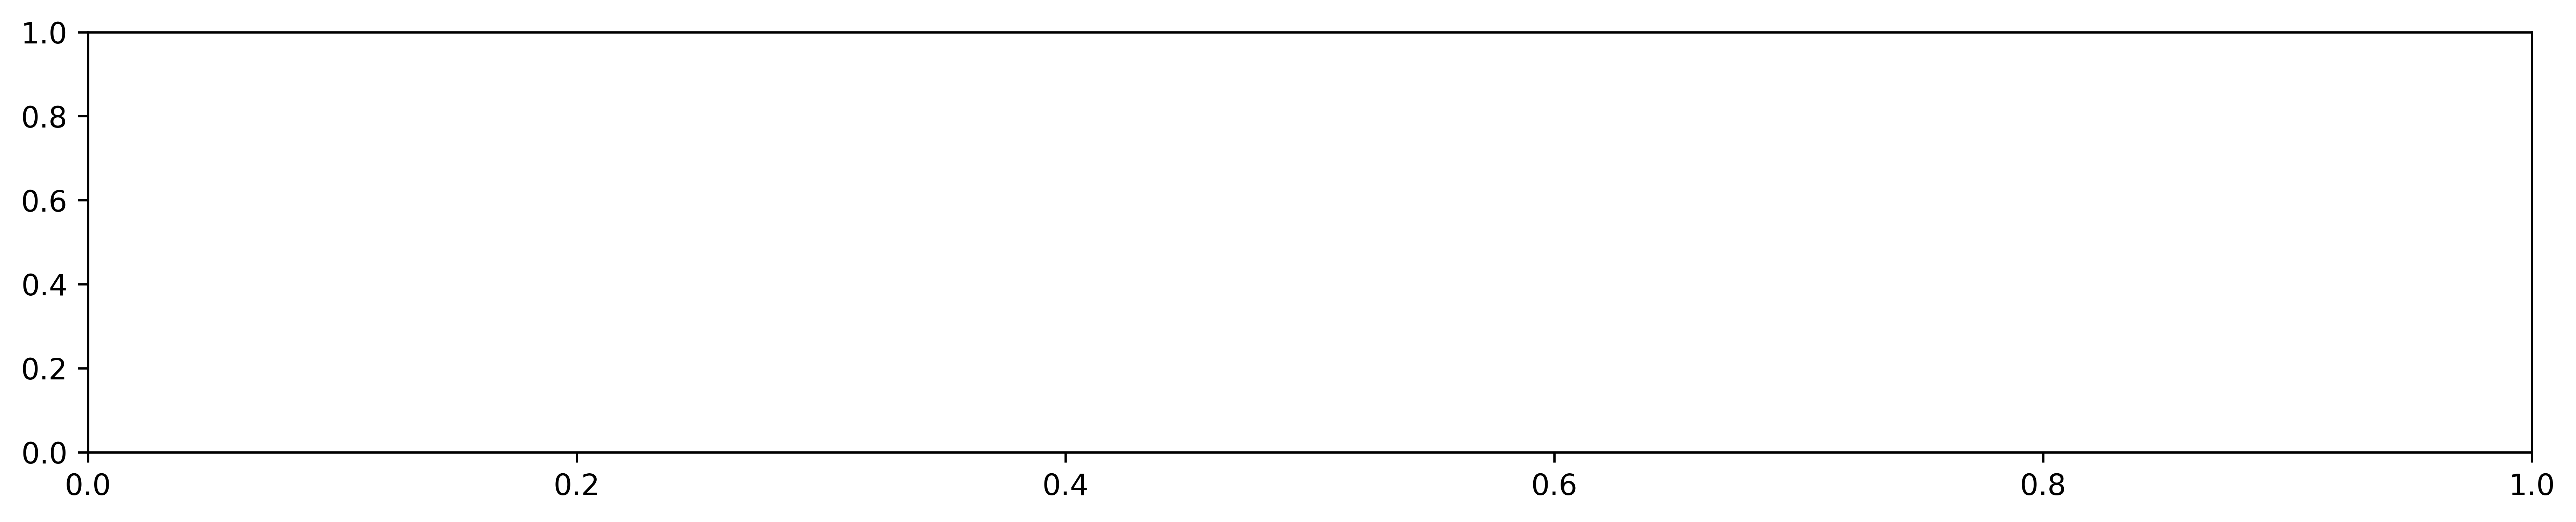

In [3]:
from matplotlib.pyplot import gca
fig = plt.figure(figsize=(15, 9),dpi=600)

# dfwest = pd.read_csv('/home/dylan/Sensitivity_Study/Salinity_Variance_Copano_West.csv', index_col=3, parse_dates=[3])
# dfeast = pd.read_csv('/home/dylan/Sensitivity_Study/Salinity_Variance_Copano_East.csv', index_col=3, parse_dates=[3])
# df1 = pd.read_csv('/home/dylan/Forcing_Mechanisms/Total River Discharge Data Final.csv', index_col=0, parse_dates=True)
# df2 = pd.read_csv('/home/dylan/Forcing_Mechanisms/MARCEMET_Wind.csv', index_col=0, parse_dates=True)
csfont = {'fontname':'Times New Roman'}
fig.tight_layout()

ax1 = plt.subplot(3,1,1)
dfwest['salt_var'].plot(color='b', label = 'Copano West')
dfeast['salt_var'].plot(color = 'k', label = 'Copano East')
ax1.set_ylabel('$(g/kg)^{2}$')
ax1.set_xticklabels([])
ax1.set_title('Salinity Variance')
ax1.set_xlabel('')
ax1.set_xlim(['2010-1-1','2016-1-1'])
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(25)
plt.legend()

ax3 = plt.subplot(3,1,2)
ax3 = df1['ComFlow']['2010-1-1':'2015-12-31'].plot()
ax3.set_ylabel(' ($m^{3}s^{-1}$)', fontsize = 11)
ax3.set_xlabel('')
ax3.set_xticklabels([])
ax3.set_xlim(['2010-1-1','2016-1-1'])
ax3.set_yticklabels(gca().get_yticks(), fontsize = 20)
ax3.set_title('River Discharge', fontsize = 20)
for item in ([ax3.title, ax3.xaxis.label, ax3.yaxis.label] +
             ax3.get_xticklabels() + ax3.get_yticklabels()):
    item.set_fontsize(25)

ax4 = plt.subplot(3,1,3)
ax4 = df2['WSpd']['2010-1-1':'2016-1-1'].plot(legend=[])
ax4.set_ylabel(' ($m^{3}s^{-1}$)')
ax4.set_xlabel('')
ax4.set_title('Wind Speed')
ax4.set_xlim(['2010-1-1','2016-1-1'])
for item in ([ax4.title, ax4.xaxis.label, ax4.yaxis.label] +
             ax4.get_xticklabels() + ax4.get_yticklabels()):
    item.set_fontsize(25)

In [4]:
#Slice the bay to obtain area for Flux
x =nc['x_rho']
y = nc['y_rho']
z = nc['h']

x1 =nc['x_rho'][1:110,400:520]
y1 = nc['y_rho'][1:110:,400:520]
z1 = nc['h'][1:110,400:520]

x2 =nc['x_rho'][1:3,416:517]
y2 = nc['y_rho'][1:3,416:517]
z2 = nc['h'][1:3,416:517]

fig = plt.figure(figsize=(6,12),dpi=100)
ax1 = plt.subplot(3,1,1)
plt.pcolormesh(x,y,z)
ax2 = plt.subplot(3,1,2)
plt.pcolormesh(x1,y1,z1)
ax2 = plt.subplot(3,1,3)
plt.pcolormesh(x2,y2,z2)


NameError: name 'nc' is not defined

In [ ]:
ds_grid = xarray.open_mfdataset('/home/dylan/Grid_Files/copano_bay_grd_g300_new2.nc')

In [ ]:
def get_depths(grid, model, loc, tidx):
    """SEE Eq. (2) or (3) on https://www.myroms.org/wiki/Vertical_S-coordinate"""
    h = grid['h'][:,:]   
    if loc=='w':
        s = grid['s_w'][:]
        Cs = grid['Cs_w'][:]
        zdim = 's_w'
    elif loc=='rho':
        s = grid['s_rho'][:]
        Cs = grid['Cs_r'][:]
        zdim = 's_rho'                      
    else:
        raise Exception('loc should be "w" or "rho"')        
    if 'zeta' in model.variables.keys():
        term0 = model['zeta'][tidx,:,:]
    else:
        print('Sea surface elevation not found, z levels calculated asuming xi=0')
        term0 = 0.*h
    term1 =  term0 + h            
    term2 = ((hc*s + h*Cs)/(hc+h))

    return (term0+term1*term2).transpose(zdim, 'eta_rho', 'xi_rho')

In [5]:
#Only Need dx & dz for Area flux. Append Q and area for use later.
dx = 1 / nc['pm'][1,420:515]
bins = np.linspace(0,40,100)
time = ds['ocean_time'][1:]
ntimes = len(time)
nbins = len(bins)
hist = np.zeros((ntimes, nbins))

VolFlux = []
Fluxin = []
Fluxout = []
SFluxin = []
SFluxout = []
S_in = []
S_out = []
Ftot = []
totalsalt = []
N = 12

for tidx in range(len(time)):
    zw = get_depths(ds_grid,ds, 'w', tidx)
    zw = zw[:,1,420:515]
    dz = np.diff(zw, axis=0)    
    q =  (nc['v'][tidx,:,1,420:515] * dx * dz)
    qsum= q.sum()
    VolFlux.append(qsum)
    qmask = np.array(q)<0
    
    salt = nc['salt'][tidx,:,1,420:515]    


    #Apply mask to filter out negative and positive and negative values of Q


    Qin_matrix = np.ma.masked_where(qmask, q)
    Qin_matrix = np.nan_to_num(Qin_matrix)
    Qin_matrix = np.ma.filled(Qin_matrix,0)
    # Qin = np.convolve(Qin_matrix[1:50], np.ones((N,))/N, mode='valid')

    Qout_matrix = np.ma.masked_where(~qmask, q)
    Qout_matrix = np.nan_to_num(Qout_matrix)
    Qout_matrix = np.ma.filled(Qout_matrix,0)
    # Qout = np.convolve(Qout_matrix[1:50], np.ones((N,))/N, mode='valid')

    Qin = Qin_matrix.sum()

    Qout = Qout_matrix.sum()

    #     Qout.fillna(0)

    Fluxin.append(Qin)
    Fluxout.append(Qout)

    #salt flux, multiply filtered values to get Fin and Fout
    
    # Fout = Qout * salt.sum()

    Fin_matrix = Qin_matrix* salt
    Fout_matrix = Qout_matrix * salt
    
    Fin = Fin_matrix.sum()
    Fout = Fout_matrix.sum()

    SFluxin.append(Fin)
    SFluxout.append(Fout)


    
data = pd.DataFrame({'Fluxin':Fluxin, 'Fluxout':Fluxout,'SFluxin':SFluxin,'SFluxout':SFluxout, 'time':ds['ocean_time'][1]})
data.set_index('time')
data.to_csv('Total_Exchange_Flow.csv')    


NameError: name 'nc' is not defined

In [6]:
N =36
volume =  (pd.read_csv('/home/dylan/Copano_Bay_Volume.csv', index_col=0, parse_dates=[0]))
volume = np.array(volume)
volume = np.delete(volume[:,0],0)
data =  pd.read_csv('/home/dylan/Total_Exchange_Flow.csv', index_col=0, parse_dates=[0])
vsalt =  pd.read_csv('/home/dylan/Normalized_Salinity_New_Zw.csv', index_col=0, parse_dates=[0])
vsalt = np.array(vsalt['salt_vavg'])
volume = np.convolve(volume[55:25918], np.ones((N,))/N, mode='valid')
Qin = np.convolve(data['Fluxin'][55:25918], np.ones((N,))/N, mode='valid')
SFin = np.convolve(data['SFluxin'][55:25918], np.ones((N,))/N, mode='valid')
S_in = SFin/Qin

FileNotFoundError: [Errno 2] File /home/dylan/Copano_Bay_Volume.csv does not exist: '/home/dylan/Copano_Bay_Volume.csv'

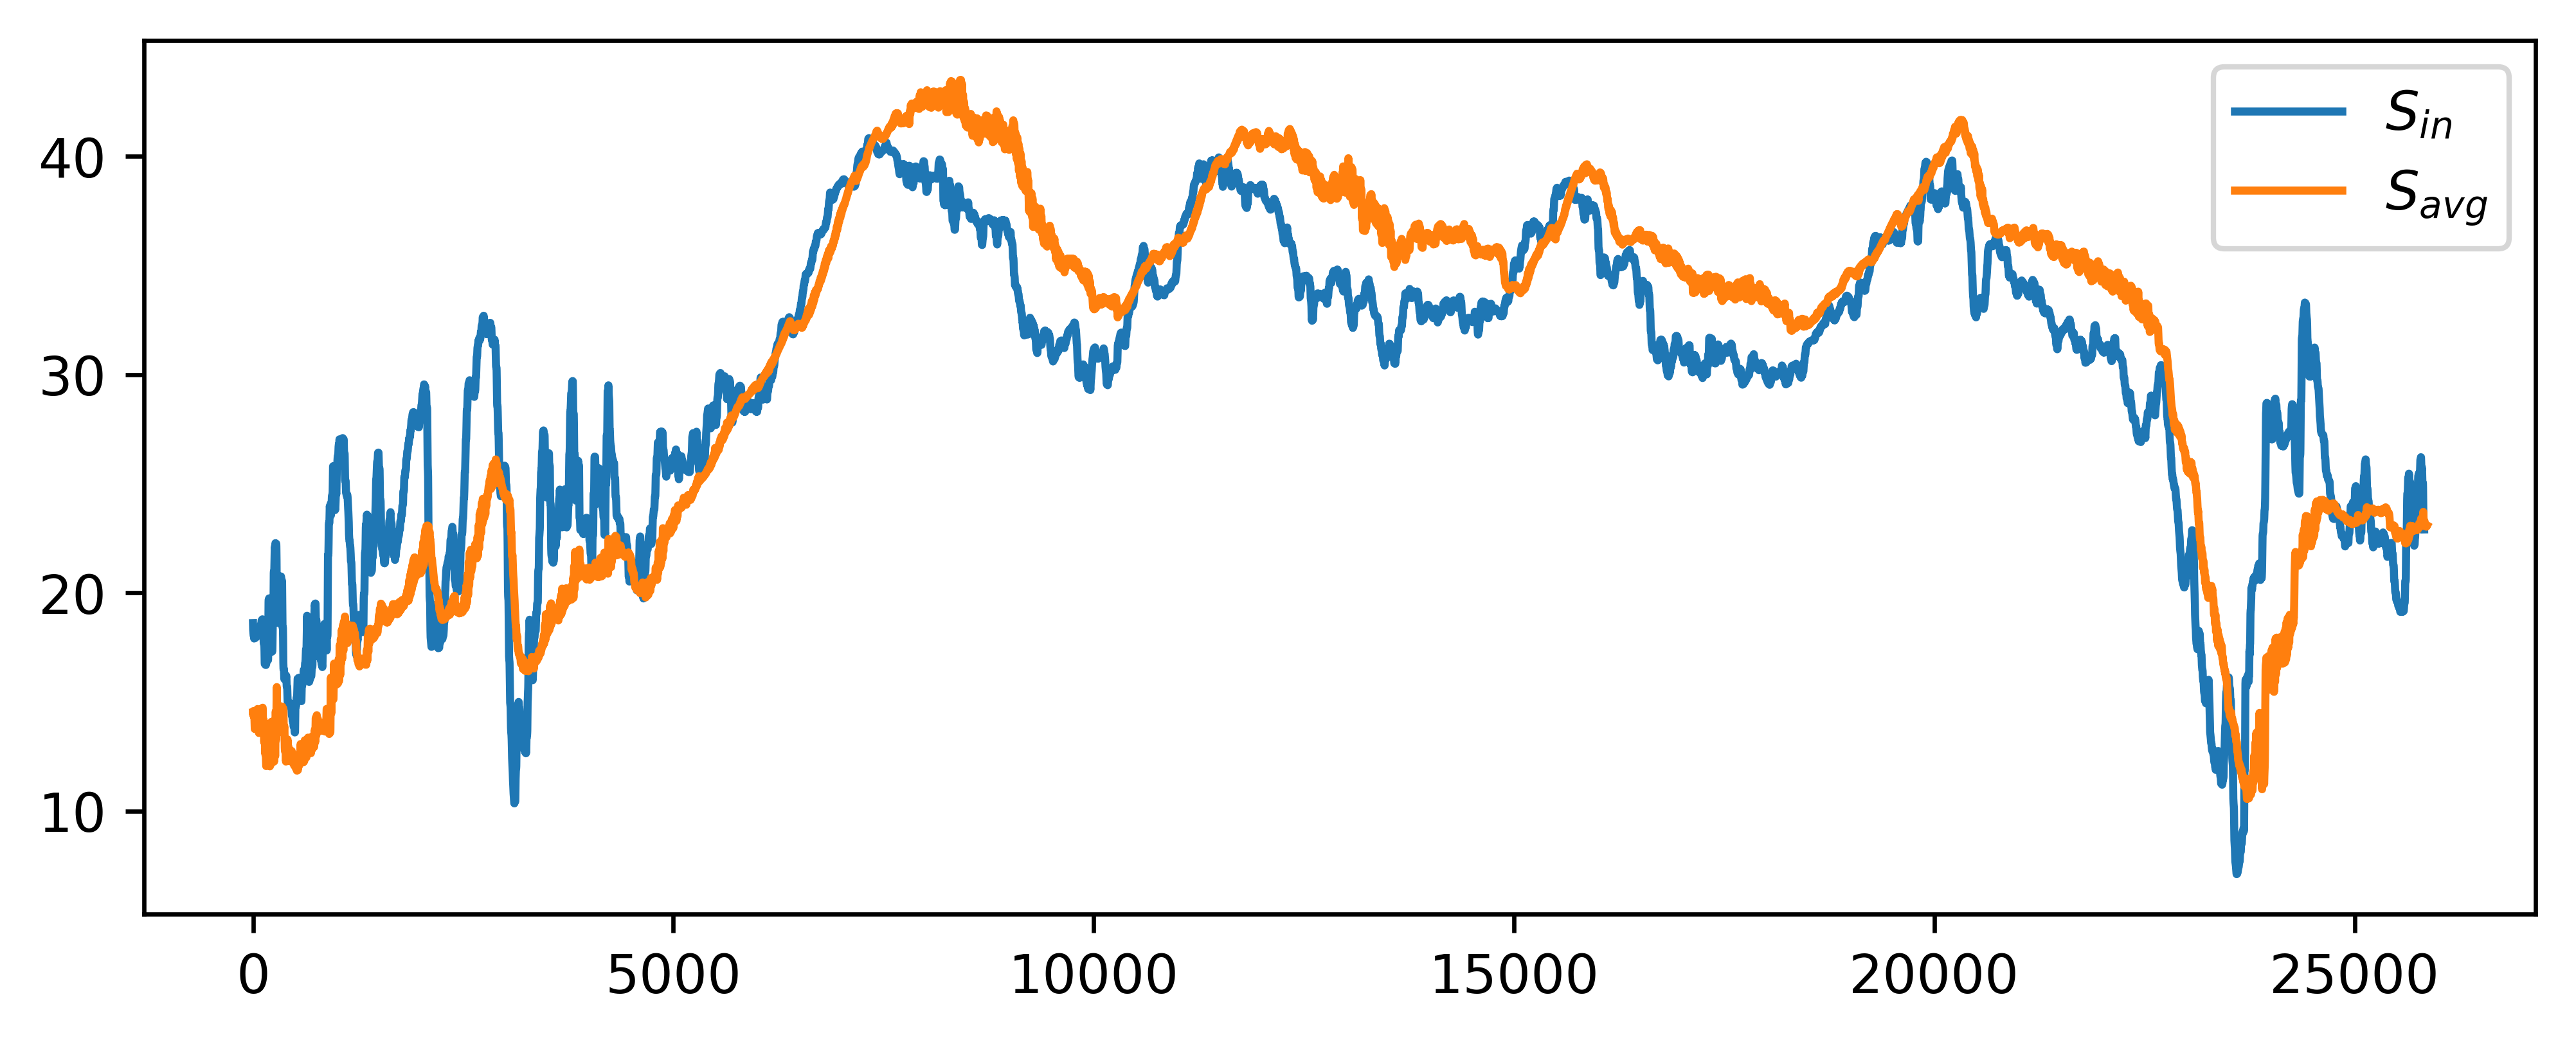

In [74]:

Qin = np.convolve(data['Fluxin'][55:25918], np.ones((N,))/N, mode='valid')
SFin = np.convolve(data['SFluxin'][55:25918], np.ones((N,))/N, mode='valid')
S_in = SFin/Qin
# vsalt = np.array(vsalt['salt_vavg'])
fig = plt.figure(figsize=(8, 3),dpi=600)
plt.plot(S_in,label = '$S_{in}$')
plt.plot(vsalt, label = '$S_{avg}$')
plt.legend()


Text(0,0.5,'Unsteadiness')

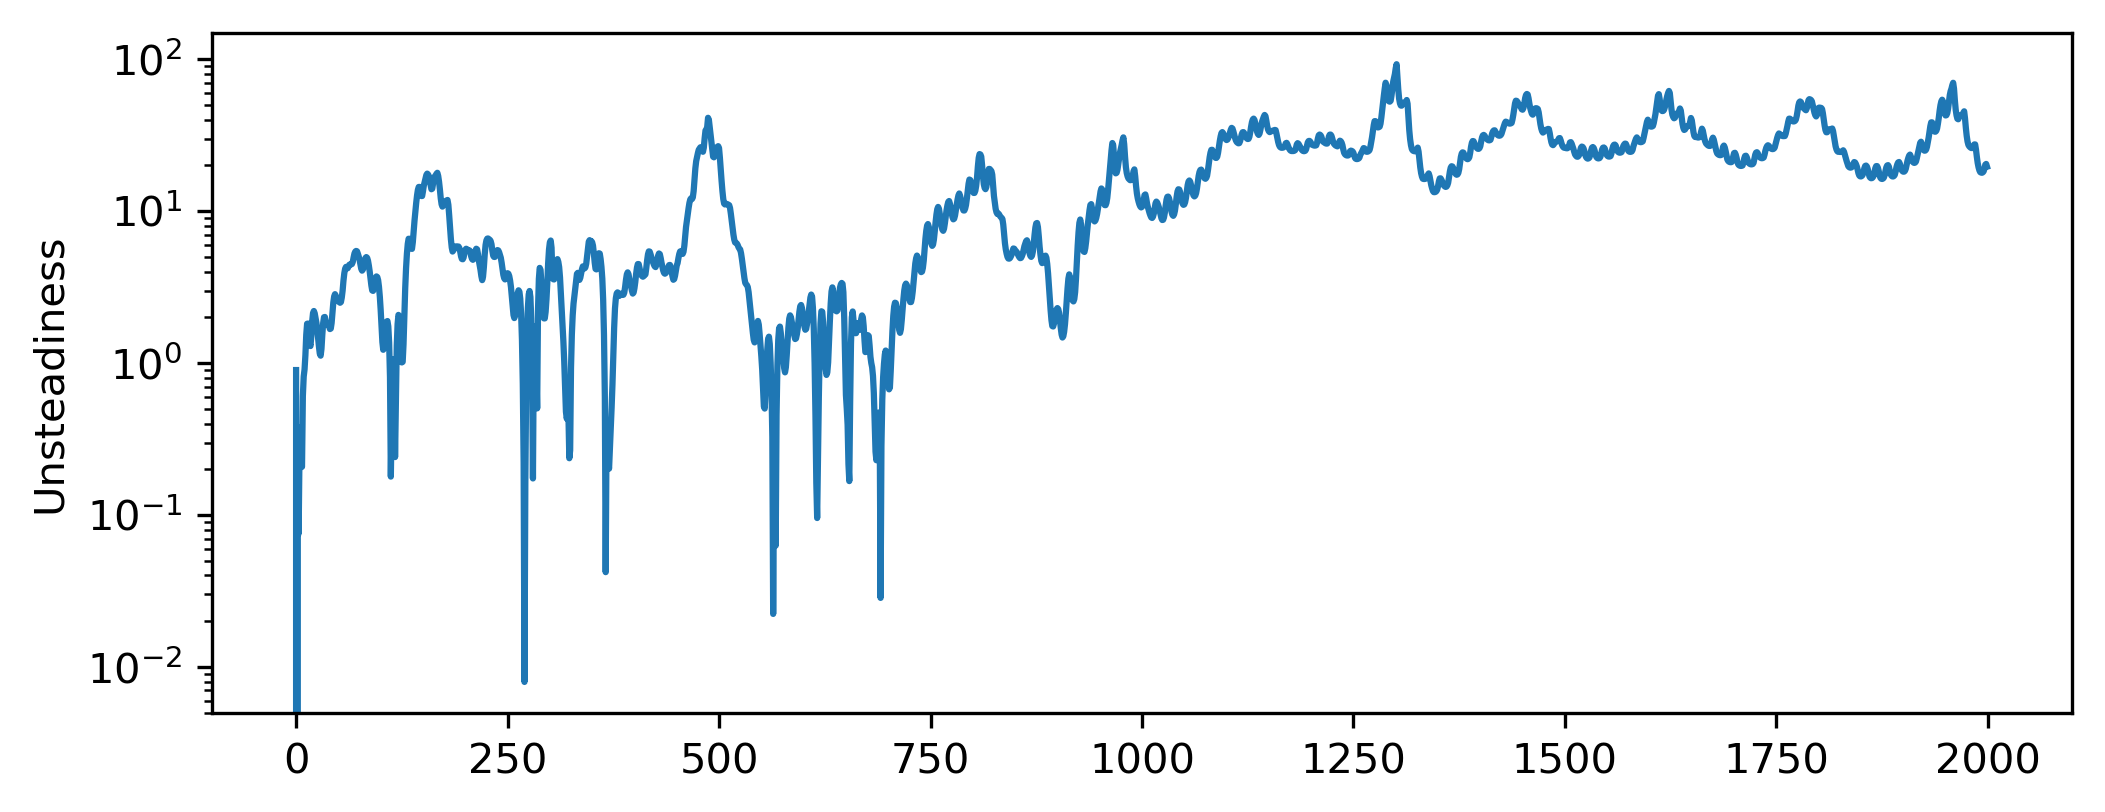

In [71]:

# vsalt = np.convolve(vsalt[:], np.ones((N,))/N, mode='valid') 
# volume = np.convolve(volume[:], np.ones((N,))/N, mode='valid')
gamma = []
for T in range(len(SFin[:2000])):
    numerator = abs((vsalt[T]*volume[T])-(vsalt[1] * volume[1]) )
    denominator = np.sum(SFin[T]  * 7200)
    unsteady = numerator/denominator
    gamma.append(unsteady)
    
fig = plt.figure(figsize=(8, 3),dpi=300)
plt.semilogy(gamma)
plt.ylabel('Unsteadiness')

Text(0.5,1,'$\\Sigma$')

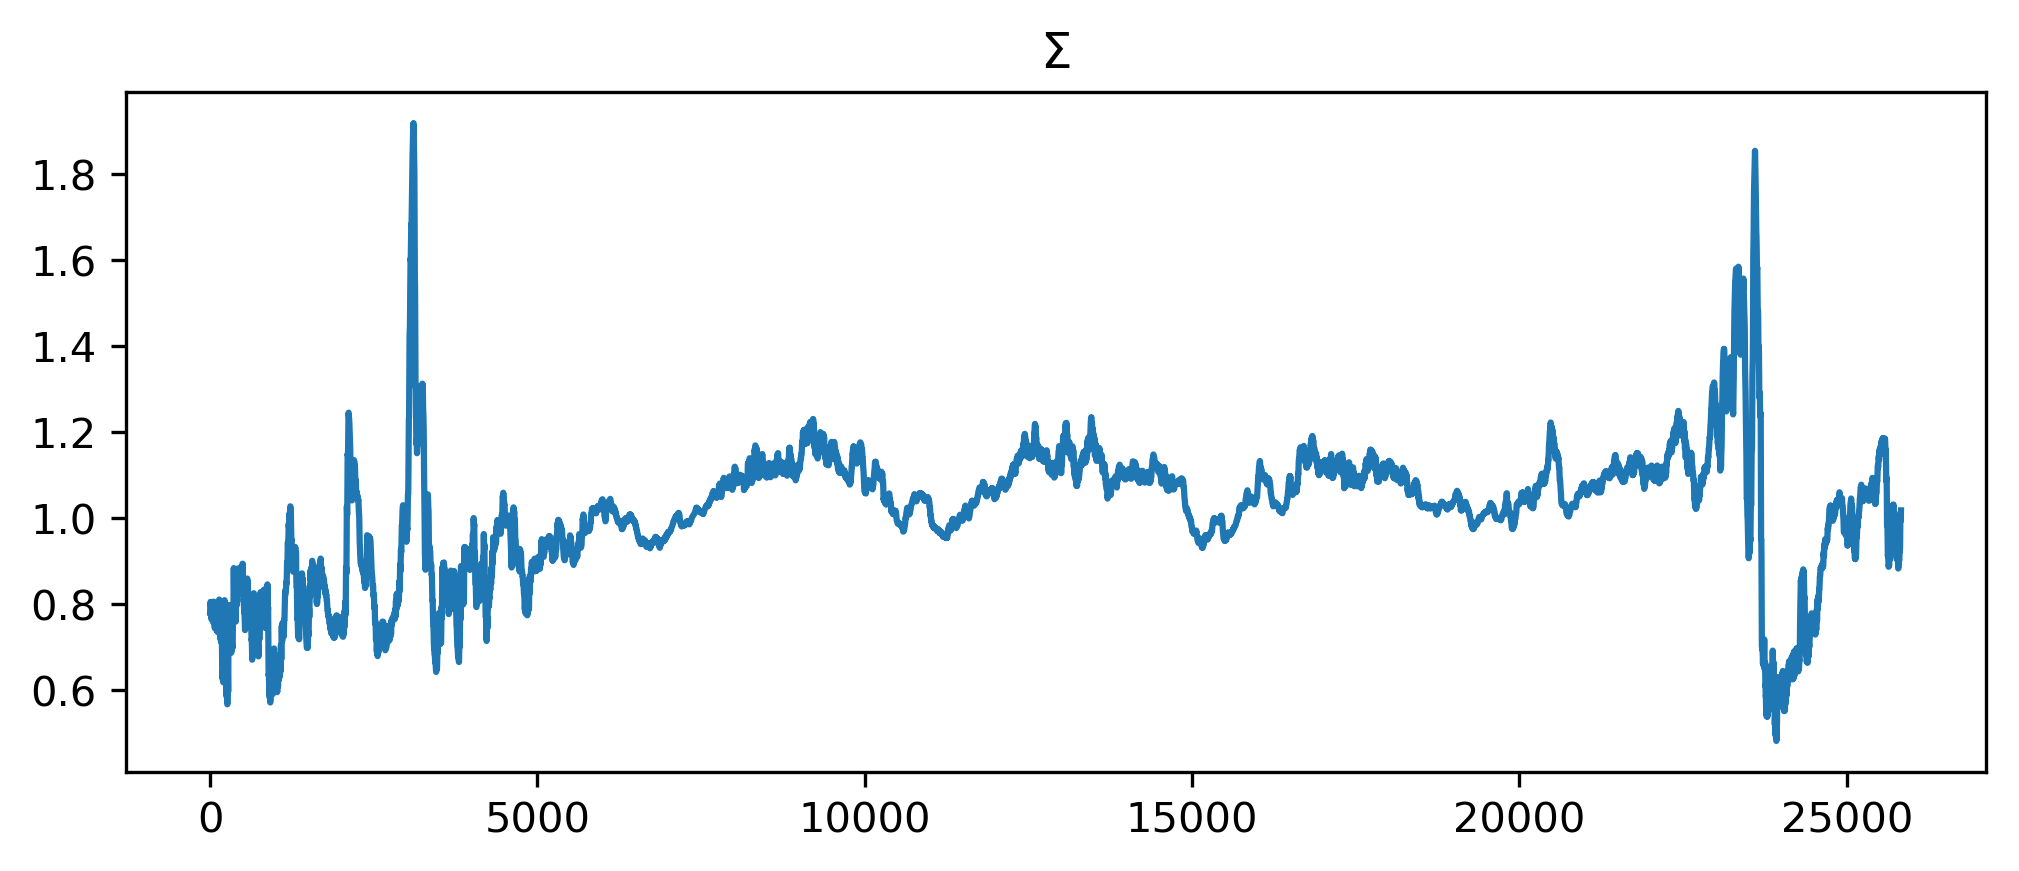

In [78]:
sigma = vsalt[0:25828]/S_in
fig = plt.figure(figsize=(8, 3),dpi=300)
plt.plot(sigma)
plt.title(r'$\Sigma$')

In [ ]:
delta.max()

In [80]:
# N = 12
# Qout = np.convolve(data['Fluxout'][55:], np.ones((N,))/N, mode='valid')
# Sout = np.convolve(data['SFluxout'][55:], np.ones((N,))/N, mode='valid')
# Qout = np.array(Qout)
# Sout = np.array(Sout)
# S_out = Sout/Qout
# S_in = np.array(S_in)

delta = (S_in-S_out)/S_in
delta = np.nan_to_num(delta)

fig = plt.figure(figsize=(11, 11),dpi=600)

ax = plt.subplot(2,1,1)
ax.plot(sigma)
ax.set_xlabel('')
# ax.set_ylabel(r'$\Sigma$')
ax.set_xlim([0,25500])
ax.set_xticklabels([])
ax.set_yticks([0.5,0.75,1,1.25])
ax.set_ylim(0.5,1.25)
plt.title('Normalized Salinity ($S _{avg}/S _{in}$)')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)

ax1 = plt.subplot(2,1,2)
ax1.plot(delta, color = 'k')
# ax1.set_ylabel(r'$\d$')
ax1.set_ylim(-0.2,0.25)
ax1.set_xlim([0,25500])
ax1.set_xticklabels([])
ax1.set_xlabel('')
# ax1.set_xticklabels([])
ax1.set_yticks([-0.2,-0.1, 0, 0.1, 0.2])
plt.title(r'Normalized Salinity Difference at Mouth $(S_{in}-S_{out})/S_{in}$')
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(18)

# fig.tight_layout()


    

NameError: name 'S_out' is not defined

In [ ]:
def reject_outliers(data, m=10):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

In [ ]:
df1 = pd.read_csv('/home/dylan/Forcing_Mechanisms/Total River Discharge Data Final.csv', index_col=0, parse_dates=True)
qr = df1['ComFlow']['2010-1-5':'2015-12-1']
qr = qr[~qr.index.duplicated()] 
qr = qr.resample('120min').asfreq()
qr = qr[6:25853]


In [ ]:
x = np.arange(0,0.5,0.002)
y = (1-x)**2
plt.plot(x,y)

In [ ]:
# salgrd = 1-sigma[:25500]
# salgrd = np.nan_to_num(salgrd)
# newsalgrd = reject_outliers(salgrd)
# newdelta = reject_outliers(delta)
fig = plt.figure(figsize=(11, 11),dpi = 600)
ax = plt.subplot(111)

ax.scatter(1-sigma[:25000],delta[:25000], color = 'gray',alpha = 0.7,s = qr[:25000])
ax.set_ylim(-0.65,0.25)
ax.set_xlabel('Longitudinal Salinity Gradient')
ax.set_ylabel(r'Predicted Stratification')

# ax1 = plt.subplot(111)
# ax1.plot(1-sigma[0:25000] >0,(1-sigma[0:25000])**2 >0, color = 'r' )




# print(np.corrcoef(newsalgrd[:24900],newdelta[:24900]))
# ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
# plt.legend()
fig.savefig('strat_@_mouth.png')



In [ ]:
sigma = np.nan_to_num(sigma)
delta = np.nan_to_num(delta)
r = np.corrcoef(1-sigma[:25000], delta[:25000])
r

In [ ]:
from scipy.optimize import curve_fit
def func(x, a, c):
    return  -(a-x) ** 2 + c

In [ ]:
xdata = np.nan_to_num(1-sigma[1:25000])
ydata = np.nan_to_num(delta[1:20000])

# popt, pcov = curve_fit(func, xdata, ydata)
# plt.plot(xdata,func(xdata, *popt))
plt.plot(xdata,-1*(1-sigma[1:20000])**2)
plt.scatter(xdata,ydata)
# plt.scatter( xdata, ydata)
# plt.plot(sigma[1:25000],1-(sigma[1:25000]**2))

In [ ]:
tauad = (volume[1:25000] * sigma[1:25000]) / abs((Qin[1:25000]*86400 * delta[1:25000]) - qr[1:25000]*86400*(1-delta[1:25000]))
plt.semilogy(tauad)

In [ ]:
fig = plt.figure(figsize=(10.5,10.5),dpi=300)
ax = plt.subplot(111)
plt.scatter(sigma[1:25000],taustar[:], color = 'navy' , s = qr[1:24999])
# plt.plot(np.polyfit(sigma[1:25000],taustar[:],5))
ax.set_xlim(0.5, 1.25)
ax.set_ylim(1e-1, 1e3)
ax.set_xticks(np.arange(.6,1.3,0.1))
# ax.tick_params(axis='both', size=16)
ax.set_ylabel(r'Freshwater Replacement Time / Adjustment')
ax.set_xlabel('Normalized Salinity')
# ax.set_yscale('log')
# for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
#              ax.get_xticklabels() + ax.get_yticklabels()):
#     item.set_fontsize(26)
print(taustar[:].mean())

In [ ]:
taustar = abs((Qin[1:25000]/qr[1:25000]) * (delta[1:25000]/sigma[1:25000]) - ((1-delta[1:25000])/sigma[1:25000]))
qx = (Qin[1:25000]/qr[1:25000])

delnew =(1 * 1 +1) /(Qin[1:25000]/qr[1:25000]  + 1)
delnew1 = (1 * 10 +1) /(Qin[1:25000]/qr[1:25000]  + 1)
delnew2 = (1 * 100 +1) /(Qin[1:25000]/qr[1:25000]  + 1)
# plt.plot(qx,delnew)
# plt.plot(qx,delnew1)
# df = pd.DataFrame(delnew)
# df = pd.DataFrame(delnew)

ax = plt.subplot(111)
ax.plot(qx,delnew)
ax.plot(qx,delnew1)
ax.plot(qx,delnew2)

ax.set_ylim(0,1)

ax.set_xscale('log')
ax.set_xlim(1, 1e4)

# plt.scatter(qx,delta[1:25000])
# plt.contour(qx,delta[1:25000],qx*delta[1:25000])
# plt.plot(taustar)
# taustar.mean()
# ax.set_yscale('log')

# plt.xlim(0,10**4)

In [ ]:
N = 24
Tau = sigma * abs((1/np.gradient(sigma)))
NewTau = np.convolve(Tau[:], np.ones((N,))/N, mode='valid') 
NewTau = np.nan_to_num(NewTau)
fig = plt.figure(figsize=(11, 3), dpi=300)
ax = plt.subplot(111)
plt.semilogy(NewTau)
plt.title('Estuarine Adjustment Time')
ax.set_ylabel('Time (Days)')
# ax.set_xticks([])
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(19)
NewTau.mean()

In [ ]:
#Calculate volume 
time = ds['ocean_time'][:]
mask = nc['mask_rho'][:]

dx = 1.0/nc['pm'][:] * mask
dy = 1.0/nc['pn'][:] * mask
vol = []
volume = []
for tidx in range(len(time)):
    zw = octant.roms.nc_depths(nc, 'w')[tidx]
#     zw = h[np.newaxis,:,:]*(hc*sw[:,np.newaxis,np.newaxis] + h[np.newaxis,:,:]*\
#                     Cs_w[:,np.newaxis,np.newaxis])/(hc+h[np.newaxis,:,:])
#     zr = h[np.newaxis,:,:]*(hc*sr[:,np.newaxis,np.newaxis] + h[np.newaxis,:,:]*\
#                     Cs_r[:,np.newaxis,np.newaxis])/(hc+h[np.newaxis,:,:])
    dz = np.diff(-zw, axis=0) 
    vol = np.sum(dx * dy * dz)
    volume.append(vol)

vole = pd.DataFrame({'Fluxin':volume})
vole.set_index('time')
vole.to_csv('Estuary_Volume.csv')    


In [1]:



Tauh = (np.array(volume[:25847])*(1/86400)) / qr
fig = plt.figure(figsize=(10.5,10.5),dpi=300)
ax = plt.subplot(111)
plt.scatter(Tauh[1:24999],tauad[1:254999], color = 'red', alpha = 0.5, s = qr[1:24999])
ax.set_yscale('log')
ax.set_xscale('log')
plt.ylim(10**1, 10**5)
plt.xlim(10**1, 10**5)
# = \frac{V}{Q_r}$ (d)
ax.set_xlabel(r'Freshwater Response Time (Days)')
ax.set_ylabel('Estuarine Adjustment Time (Days)')
# plt.title('Adjustment Time vs Hydraulic Flushing Time')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(19)
# plt.legend()

print(Tauh.mean(),'Mean Flushing Time')
print(tauad.mean(),'Mean Adjustment Time')

NameError: name 'np' is not defined

In [81]:
df1 = pd.read_csv('/home/dylan/Forcing_Mechanisms/Total River Discharge Data Final.csv', index_col=0, parse_dates=True)
qr = df1['ComFlow']['2010-1-5':'2015-12-1']
qr = qr[~qr.index.duplicated()] 
qr = qr.resample('120min').asfreq()
qr = qr[6:25853]


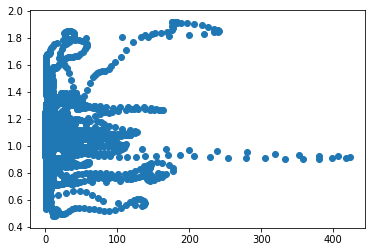

In [89]:
plt.scatter(qr[0:25828],sigma,)